In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.datasets import make_moons, make_blobs, make_circles
%matplotlib inline

## Задание 1

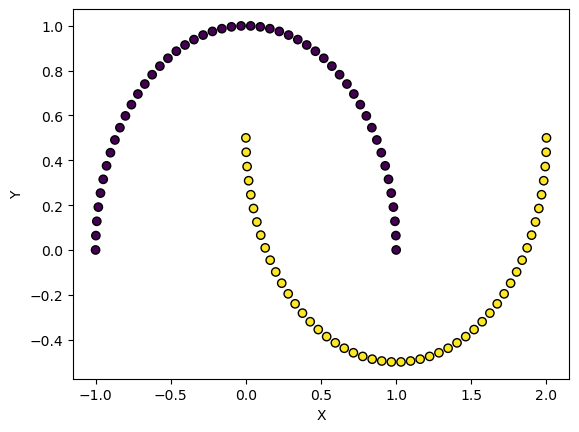

In [2]:
X_m, y_m = make_moons(n_samples=100)
plt.scatter(X_m[:, 0], X_m[:, 1], c=y_m, edgecolors='k')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

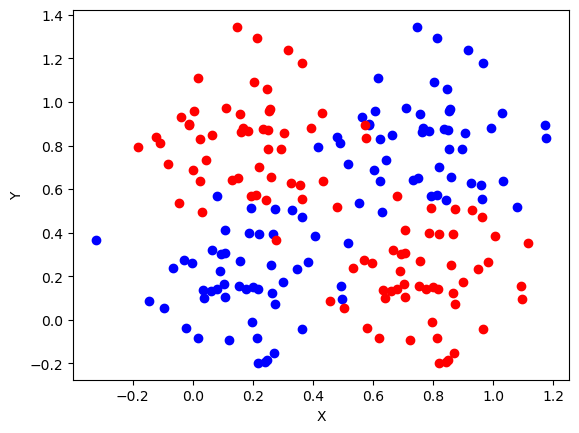

In [3]:
X_b, y_b = make_blobs(n_samples=[50, 50], centers=[[0.2, 0.2], [0.8, 0.8]], random_state=42, shuffle=False, center_box=(0, 0.8), cluster_std=0.2)
X_2_b, y_2_b = make_blobs(n_samples=[50, 50], centers=[[0.8, 0.2], [0.2, 0.8]], random_state=42, shuffle=False, center_box=(0, 0.8), cluster_std=0.2)

plt.scatter(X_b[y_b == 0][:, 0], X_b[y_b == 0][:, 1], c='blue')
plt.scatter(X_b[y_b == 1][:, 0], X_b[y_b == 1][:, 1], c='blue')
plt.scatter(X_2_b[y_2_b == 0][:, 0], X_2_b[y_2_b == 0][:, 1], c='red')
plt.scatter(X_2_b[y_2_b == 1][:, 0], X_2_b[y_2_b == 1][:, 1], c='red')

plt.xlabel('X')
plt.ylabel('Y')

plt.show()

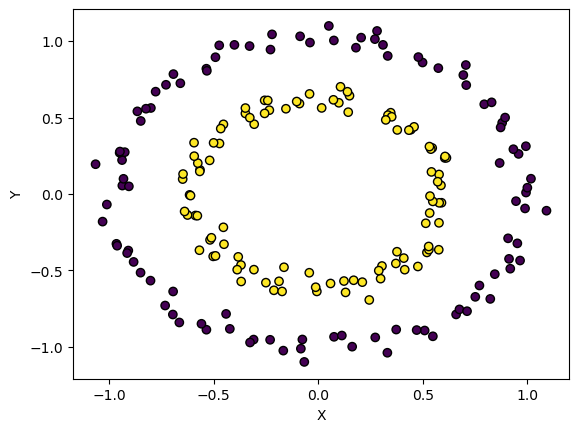

In [4]:
X_c, y_c = make_circles(n_samples=200, noise=0.05, factor=0.6)
plt.scatter(X_c[:, 0], X_c[:, 1], c=y_c, edgecolors='k')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [5]:
def analyze_classification(X, y, title):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    train_accuracy = []
    test_accuracy = []
    f1_scores = []
    k_values = list(range(1, 9))

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        train_pred = knn.predict(X_train)
        test_pred = knn.predict(X_test)
        train_accuracy.append(accuracy_score(y_train, train_pred))
        test_accuracy.append(accuracy_score(y_test, test_pred))
        f1_scores.append(f1_score(y_test, test_pred))
        
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(k_values, train_accuracy, label='Train Accuracy', marker='o')
    plt.plot(k_values, test_accuracy, label='Test Accuracy', marker='o')
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy vs. k ({title})')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(k_values, f1_scores, label='F1 Score', marker='o')
    plt.xlabel('k')
    plt.ylabel('F1 Score')
    plt.title(f'F1 Score vs. k ({title})')

    plt.tight_layout()
    plt.show()
    
    best_k = k_values[np.argmax(f1_scores)]
    knn = KNeighborsClassifier(n_neighbors=best_k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    confusion = confusion_matrix(y_test, y_pred)

    print(f'Best k: {best_k}')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print('Confusion Matrix:')
    print(confusion)

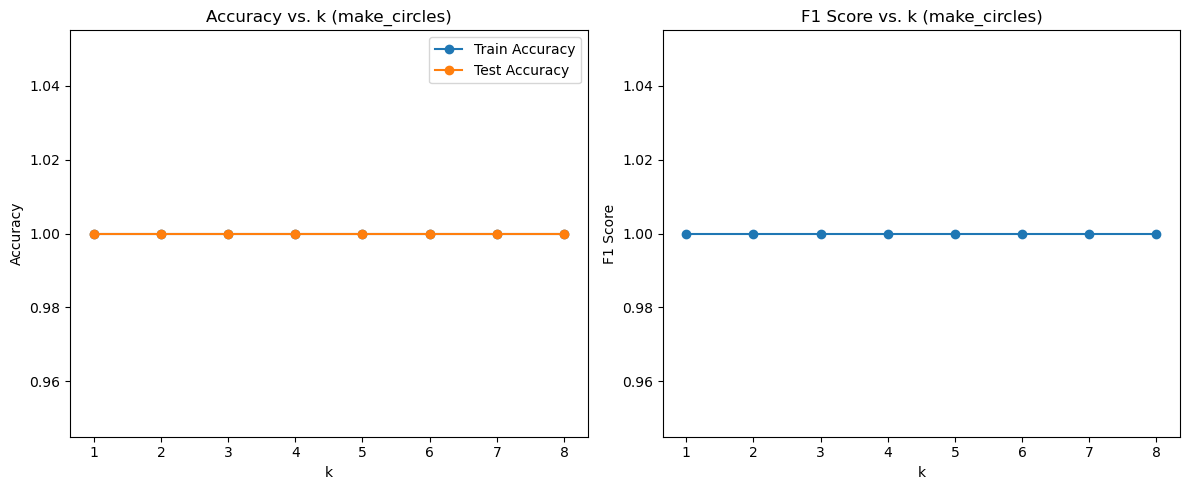

Best k: 1
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[18  0]
 [ 0 22]]


In [6]:
X_c, y_c = make_circles(n_samples=200, noise=0.05, factor=0.6)
analyze_classification(X_c, y_c, 'make_circles')

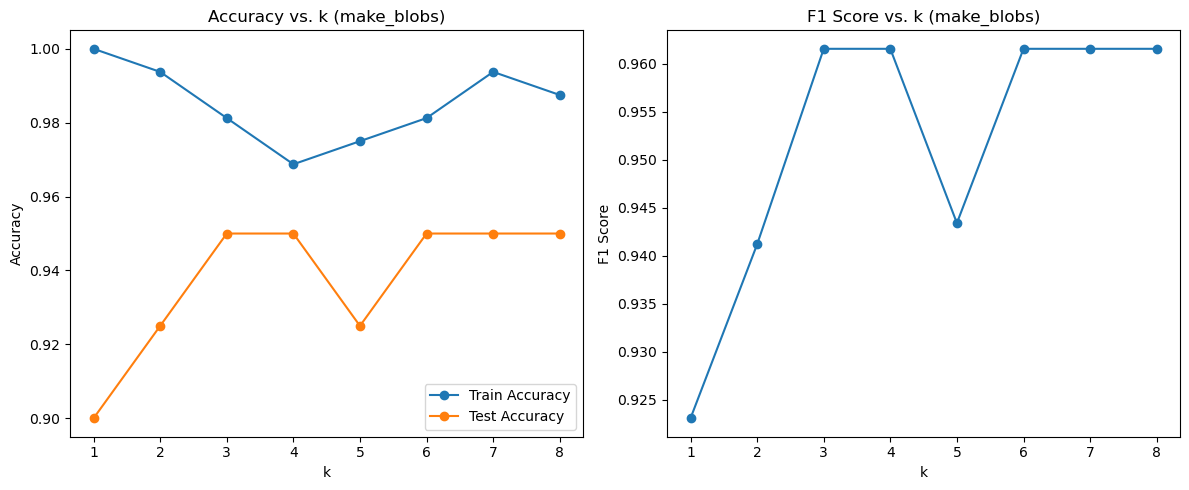

Best k: 3
Accuracy: 0.95
Precision: 0.9259259259259259
Recall: 1.0
F1 Score: 0.9615384615384615
Confusion Matrix:
[[13  2]
 [ 0 25]]


In [7]:
X_b, y_b = make_blobs(n_samples=[50, 50], centers=[[0.2, 0.2], [0.8, 0.8]], random_state=42, shuffle=False, center_box=(0, 0.8), cluster_std=0.2)
X_2_b, y_2_b = make_blobs(n_samples=[50, 50], centers=[[0.8, 0.2], [0.2, 0.8]], random_state=42, shuffle=False, center_box=(0, 0.8), cluster_std=0.2)
X_b = np.concatenate((X_b, X_2_b))
y_b = np.concatenate((y_b, y_2_b))
analyze_classification(X_b, y_b, 'make_blobs')

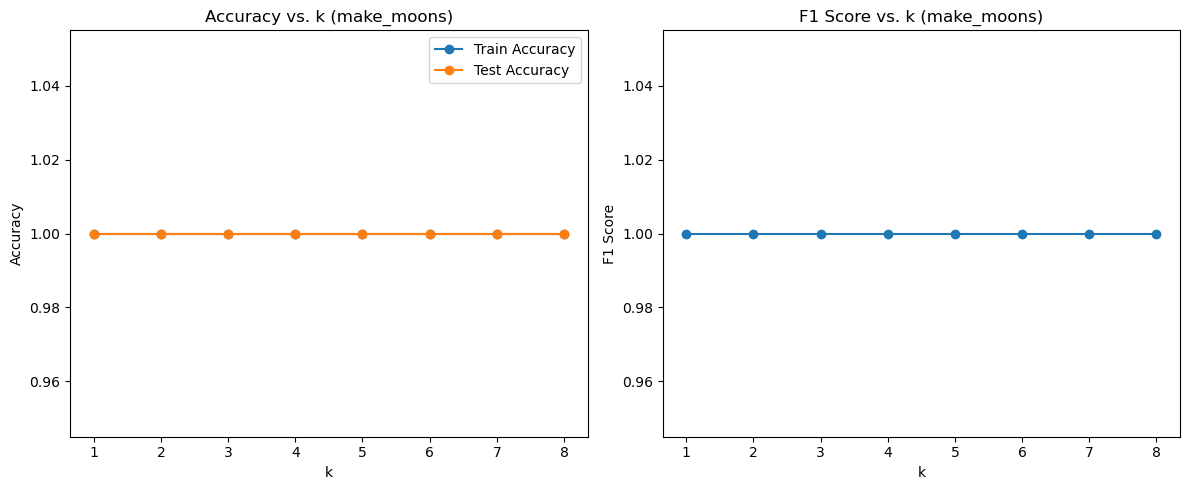

Best k: 1
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[ 9  0]
 [ 0 11]]


In [8]:
X_m, y_m = make_moons(n_samples=100)
analyze_classification(X_m, y_m, 'make_moons')

## Задание 2

In [9]:
def classification_report_numpy(y_true, y_pred, labels):
    report = {}
    unique_labels = np.unique(labels)

    for label in unique_labels:
        true_positive = np.sum((y_true == label) & (y_pred == label))
        false_positive = np.sum((y_true != label) & (y_pred == label))
        false_negative = np.sum((y_true == label) & (y_pred != label))
        true_negative = np.sum((y_true != label) & (y_pred != label))

        precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
        recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        report[label] = {
            'precision': precision,
            'recall': recall,
            'f1-score': f1_score,
            'support': np.sum(y_true == label)
        }

    macro_precision = np.mean([metrics['precision'] for metrics in report.values()])
    macro_recall = np.mean([metrics['recall'] for metrics in report.values()])
    macro_f1_score = np.mean([metrics['f1-score'] for metrics in report.values()])
    weighted_precision = np.average([metrics['precision'] for metrics in report.values()], weights=[metrics['support'] for metrics in report.values()])
    weighted_recall = np.average([metrics['recall'] for metrics in report.values()], weights=[metrics['support'] for metrics in report.values()])
    weighted_f1_score = np.average([metrics['f1-score'] for metrics in report.values()], weights=[metrics['support'] for metrics in report.values()])

    accuracy = np.sum(y_true == y_pred) / len(y_true)
    
    report['accuracy'] = {
        'precision': '-',
        'recall': '-',
        'f1-score': accuracy,
        'support': len(y_true)
    }

    report['macro avg'] = {
        'precision': macro_precision,
        'recall': macro_recall,
        'f1-score': macro_f1_score,
        'support': len(y_true)
    }

    report['weighted avg'] = {
        'precision': weighted_precision,
        'recall': weighted_recall,
        'f1-score': weighted_f1_score,
        'support': len(y_true)
    }

    return report

def confusion_matrix_numpy(y_true, y_pred, labels):
    num_classes = len(labels)
    confusion_matrix = np.zeros((num_classes, num_classes), dtype=np.int16)

    for i in range(num_classes):
        for j in range(num_classes):
            confusion_matrix[i, j] = np.sum((y_true == labels[i]) & (y_pred == labels[j]))

    return confusion_matrix

In [10]:
y_true = np.array(['C', 'C', 'C', 'C', 'C', 'C', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H'])
y_pred = np.array(['C', 'C', 'C', 'C', 'H', 'F', 'C', 'C', 'C', 'C', 'C', 'C', 'H', 'H', 'F', 'F', 'C', 'C', 'C', 'H', 'H', 'H', 'H', 'H', 'H'])
labels = ['C', 'F', 'H']

report = classification_report_numpy(y_true, y_pred, labels)
df = pd.DataFrame(report).transpose()
df = df.reset_index().rename(columns={'index': 'Class'})
df = df[['Class', 'precision', 'recall', 'f1-score', 'support']]

conf_matrix = confusion_matrix_numpy(y_true, y_pred, labels=labels)
conf_df = pd.DataFrame(conf_matrix, index=labels, columns=labels)

print('Confusion matrix')
print(conf_df)
print('')
print('-' * 80)
print('Classification report')
print('')
print(df)

Confusion matrix
   C  F  H
C  4  1  1
F  6  2  2
H  3  0  6

--------------------------------------------------------------------------------
Classification report

          Class precision    recall  f1-score support
0             C  0.307692  0.666667  0.421053     6.0
1             F  0.666667       0.2  0.307692    10.0
2             H  0.666667  0.666667  0.666667     9.0
3      accuracy         -         -      0.48      25
4     macro avg  0.547009  0.511111  0.465137    25.0
5  weighted avg  0.580513      0.48   0.46413    25.0


## Задание 3

In [11]:
df = pd.read_csv('Real estate.csv', index_col='No')
df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6


<Axes: xlabel='X6 longitude', ylabel='X5 latitude'>

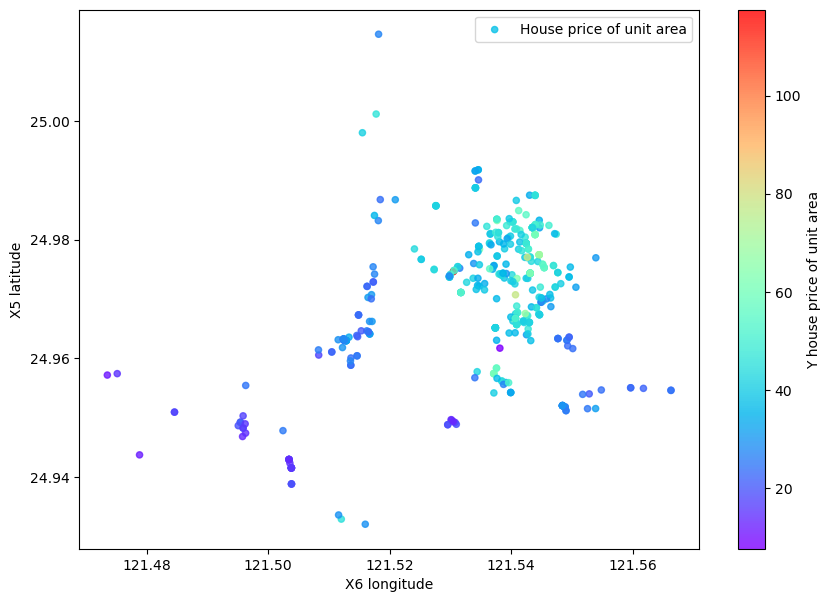

In [12]:
df.plot(kind='scatter', x='X6 longitude', y='X5 latitude', alpha=0.8,
             label='House price of unit area', figsize=(10, 7),
             c='Y house price of unit area', cmap=plt.get_cmap('rainbow'),
             colorbar=True)

#### Выбираем 3 переменыне, а именно X2, X3 и X4

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [14]:
house_data = df[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'Y house price of unit area']]
house_data.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
No,,,,
1,32.0,84.87882,10,37.9
2,19.5,306.59470,9,42.2
3,13.3,561.98450,5,47.3
4,13.3,561.98450,5,54.8
5,5.0,390.56840,5,43.1


In [15]:
train, test = train_test_split(house_data, test_size=0.2, random_state=42, shuffle=True)

In [16]:
model = LinearRegression()
for col in train.columns[:3]:
    x = train[col].values.reshape(-1, 1)
    model.fit(x, train['Y house price of unit area'])
    predict = model.predict(test[col].values.reshape(-1, 1))
    print(f'R2 для колонки {col}:', r2_score(test['Y house price of unit area'], predict))

R2 для колонки X2 house age: 0.015227904910820378
R2 для колонки X3 distance to the nearest MRT station: 0.5389597665019772
R2 для колонки X4 number of convenience stores: 0.3935470378244481


Лучше всего показала себя колонка X3 distance to the nearest MRT station